# Text Analysis using Python 

In [52]:
# we will explore a data set of tweets that include @apple

In [53]:
# import libraries 

import pandas as pd 

import nltk  # for NLP - natural language tool kit

from nltk.tokenize import word_tokenize  # splits the text into tokens 

from nltk.corpus import stopwords # removes non-useful words 

from sklearn.feature_extraction.text import CountVectorizer # converts text into document-term matrices

import seaborn as sns 

import matplotlib.pyplot as plt 

import wordcloud

from wordcloud import WordCloud

from textblob import TextBlob

In [54]:
# Install necessary dependencies from NLTK

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Data Sourcing

In [55]:
# load our data set

tweets = pd.read_csv('apple_tweets.csv')

## Data Exploration

In [56]:
# inspect the data

tweets.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,5746452.0,1.090000e+18,1548799817,waltmossberg,It’s true that @Apple likely overpriced the la...,Twitter for iPad,279,NaN,NaN,NaN,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
1,5746452.0,1.090000e+18,1548800328,waltmossberg,@AaronSuplizio @Apple Yes it is.,Twitter for iPad,10,1.090000e+18,2.365419e+07,AaronSuplizio,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
2,5746452.0,1.090000e+18,1548802301,waltmossberg,"@mvigod @Apple As I have said many times here,...",Twitter for iPad,259,1.090000e+18,2.224800e+08,mvigod,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
3,5746452.0,1.090000e+18,1548800242,waltmossberg,I’m not saying that @Apple doesn’t have proble...,Twitter for iPad,270,1.090000e+18,5.746452e+06,waltmossberg,...,21783,31007,1178213411,True,https://t.co/AH9VhHsJmY,http://www.theverge.com/label/walt-mossberg-verge,en,https://pbs.twimg.com/profile_banners/5746452/...,http://abs.twimg.com/images/themes/theme9/bg.gif,http://pbs.twimg.com/profile_images/4637351296...
4,1175221.0,1.090000e+18,1548737368,digiphile,@DaveLeeBBC @Apple @NYGovCuomo Nor I; saw it g...,Twitter for iPhone,88,1.090000e+18,1.251786e+09,DaveLeeBBC,...,165604,108196,1173899540,True,https://t.co/QWOxhaw2kk,https://digiphile.info/about/,en,https://pbs.twimg.com/profile_banners/1175221/...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/1076306605...


In [57]:
# get the number of rows and columns 

tweets.shape

(9991, 88)

In [58]:
# view the data types 

tweets.dtypes

user_id                   float64
status_id                 float64
created_at                  int64
screen_name                object
text                       object
                           ...   
profile_expanded_url       object
account_lang               object
profile_banner_url         object
profile_background_url     object
profile_image_url          object
Length: 88, dtype: object

## Data Cleaning 

In [59]:
tweets.columns

Index(['user_id', 'status_id', 'created_at', 'screen_name', 'text', 'source',
       'display_text_width', 'reply_to_status_id', 'reply_to_user_id',
       'reply_to_screen_name', 'is_quote', 'is_retweet', 'favorite_count',
       'retweet_count', 'hashtags', 'symbols', 'urls_url', 'urls_t.co',
       'urls_expanded_url', 'media_url', 'media_t.co', 'media_expanded_url',
       'media_type', 'ext_media_url', 'ext_media_t.co',
       'ext_media_expanded_url', 'ext_media_type', 'mentions_user_id',
       'mentions_screen_name', 'lang', 'quoted_status_id', 'quoted_text',
       'quoted_created_at', 'quoted_source', 'quoted_favorite_count',
       'quoted_retweet_count', 'quoted_user_id', 'quoted_screen_name',
       'quoted_name', 'quoted_followers_count', 'quoted_friends_count',
       'quoted_statuses_count', 'quoted_location', 'quoted_description',
       'quoted_verified', 'retweet_status_id', 'retweet_text',
       'retweet_created_at', 'retweet_source', 'retweet_favorite_count',
    

In [60]:
# keep only interesting columns 

tweets = tweets[['text', 'screen_name', 'favourites_count', 'retweet_count', 'verified']]

In [61]:
tweets.head()

,text,screen_name,favourites_count,retweet_count,verified
0,It’s true that @Apple likely overpriced the la...,waltmossberg,31007,160,True
1,@AaronSuplizio @Apple Yes it is.,waltmossberg,31007,0,True
2,"@mvigod @Apple As I have said many times here,...",waltmossberg,31007,0,True
3,I’m not saying that @Apple doesn’t have proble...,waltmossberg,31007,53,True
4,@DaveLeeBBC @Apple @NYGovCuomo Nor I; saw it g...,digiphile,108196,0,True


In [62]:
# pull a random tweet's text 

tweets['text'].iloc[680]

'✨🍎@Apple : Apple was warned about the FaceTime eavesdropping bug last week https://t.co/zry3BCizbj #Tech #Apple $AAPL #Technology #TechNews https://t.co/ip8dhXg48K'

In [63]:
# convert everything to lower case 

tweets['text'] = tweets['text'].str.lower()

In [64]:
tweets['text'].iloc[680]

'✨🍎@apple : apple was warned about the facetime eavesdropping bug last week https://t.co/zry3bcizbj #tech #apple $aapl #technology #technews https://t.co/ip8dhxg48k'

In [65]:
# remove @'s and hashtags 

tweets['text'] = tweets['text'].replace(to_replace = '[#@$]\w+', value = ' ', regex = True)

In [66]:
tweets['text'].iloc[680]

'✨🍎  : apple was warned about the facetime eavesdropping bug last week https://t.co/zry3bcizbj           https://t.co/ip8dhxg48k'

In [67]:
# deal with quote marks being difficult

# use the ragex = (\u2019)

tweets['text'] = tweets['text'].replace(to_replace = '(\u2019)', value = "'", regex = True)

# replace the most common contractions - ie replacing it's for its is, don't for do not 

tweets['text'] = tweets['text'].replace(to_replace = "n't", value = " not", regex = True)

tweets['text'] = tweets['text'].replace(to_replace = "it's", value = "it is", regex = True)

tweets['text'] = tweets['text'].replace(to_replace = "'ve", value = " have", regex = True)

tweets['text'] = tweets['text'].replace(to_replace = "i'm", value = "i am", regex = True)

tweets['text'] = tweets['text'].replace(to_replace = "'s", value = "", regex = True)

In [68]:
# remove the ampersands

tweets['text'] = tweets['text'].replace(to_replace = "&amp", value = "", regex = True)

In [69]:
# remove links - https[s]?:\/\/[^\s]+

tweets['text'] = tweets['text'].replace(to_replace = "https[s]?:\/\/[^\s]+", value = "", regex = True)

In [70]:
# remove numbers - \d+

tweets['text'] = tweets['text'].replace(to_replace = "\d+", value = "", regex = True)

In [71]:
# remove standard punctuation - \W

tweets['text'] = tweets['text'].replace(to_replace = "\W", value = " ", regex = True)

In [72]:
# remove extra spaces 

tweets['text'] = tweets['text'].replace(to_replace = "\s+", value = " ", regex = True)

In [73]:
tweets['text'].head()

0    it is true that likely overpriced the latest i...
1                                           yes it is 
2     as i have said many times here with regard to...
3    i am not saying that does not have problems an...
4     nor i saw it go by and then tracked it down t...
Name: text, dtype: object

## Text Processing

In [74]:
tweets.head()

,text,screen_name,favourites_count,retweet_count,verified
0,it is true that likely overpriced the latest i...,waltmossberg,31007,160,True
1,yes it is,waltmossberg,31007,0,True
2,as i have said many times here with regard to...,waltmossberg,31007,0,True
3,i am not saying that does not have problems an...,waltmossberg,31007,53,True
4,nor i saw it go by and then tracked it down t...,digiphile,108196,0,True


In [75]:
tweets['text'].iloc[680]

' apple was warned about the facetime eavesdropping bug last week '

#### tokenise the words so that they can be dealt with individually

In [76]:
tweets['text'] = tweets['text'].apply(word_tokenize)

In [77]:
tweets.head()

,text,screen_name,favourites_count,retweet_count,verified
0,"[it, is, true, that, likely, overpriced, the, ...",waltmossberg,31007,160,True
1,"[yes, it, is]",waltmossberg,31007,0,True
2,"[as, i, have, said, many, times, here, with, r...",waltmossberg,31007,0,True
3,"[i, am, not, saying, that, does, not, have, pr...",waltmossberg,31007,53,True
4,"[nor, i, saw, it, go, by, and, then, tracked, ...",digiphile,108196,0,True


#### remove common words (stop words)

In [78]:
to_remove = stopwords.words('english')

In [79]:
to_remove

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [80]:
# can add specific words to remove 

to_remove.extend(['apple', 'aapl', 'get'])

In [81]:
# filter the words, removing the ones in stop_words and those of <= 2 letters 

tweets['text'] = tweets['text'].apply(lambda tweet: [word for word in tweet
                                                    if word not in to_remove
                                                    and len(word) >2])

## option - lemmitisation 

In [82]:
# lemmatisation

# replacing words with their root word

In [83]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from collections import defaultdict

In [84]:
# object to lemmatize the words

lemma = WordNetLemmatizer()

In [85]:
# dictionary to convert between part-of-speach tags and the ones that the lematizer understands

# this includes adjectives, verbs and adverbs - all to their common root

tag_dict = defaultdict(lambda: wordnet.NOUN)
tag_dict['J'] = wordnet.ADJ
tag_dict['V'] = wordnet.VERB
tag_dict['R'] = wordnet.ADV



In [86]:
# function to lemmatize a sentence 

def get_lemma(word):
    tag = pos_tag([word])[0][1][0]
    tag = tag_dict[tag]
    
    return lemma.lemmatize(word, tag)

In [87]:
# from here upwards you can use this for any text analysis data you would like to use 

In [88]:
# actually perform the lemmatisation 

tweets['text'] = tweets['text'].apply(lambda x: [get_lemma(word) for word in x])

In [89]:
# drop rows with zero words remaining

tweets = tweets[tweets['text'].str.len() > 0]

In [90]:
tweets.shape

(9907, 5)

## End of the Lemmatisation Section

In [91]:
tweets.head()

,text,screen_name,favourites_count,retweet_count,verified
0,"[true, likely, overprice, late, iphones, matur...",waltmossberg,31007,160,True
1,[yes],waltmossberg,31007,0,True
2,"[say, many, time, regard, multiple, company, m...",waltmossberg,31007,0,True
3,"[say, problem, challenge, say, perspective, or...",waltmossberg,31007,53,True
4,"[saw, tracked, confirm]",digiphile,108196,0,True


In [92]:
# join the lists of words back into strings

tweets['text'] = tweets['text'].apply(lambda tweet: " ".join(tweet))

In [93]:
tweets.head()

,text,screen_name,favourites_count,retweet_count,verified
0,true likely overprice late iphones mature mark...,waltmossberg,31007,160,True
1,yes,waltmossberg,31007,0,True
2,say many time regard multiple company market c...,waltmossberg,31007,0,True
3,say problem challenge say perspective order ma...,waltmossberg,31007,53,True
4,saw tracked confirm,digiphile,108196,0,True


## Text Analysis

In [94]:
# how many rows does the word 'bug' appear in our tweets? 

search = input('Enter a word: ')
tweets[tweets['text'].str.contains(search)]['text'].count()

Enter a word: bug


487

In [95]:
# returns the actual tweets with the searched word 

search = input('Enter a word: ')
tweets[tweets['text'].str.contains(search)]['text']

Enter a word: bug


43                 rush fix bug let user eavesdrop others
82      newly discover bug facetime potential threat i...
83      say issue software patch later week bug let ip...
124     wtf major iphone facetime bug let eavesdrop ip...
139     ironic glitch story banner io bug call bug ins...
                              ...                        
9267    well work somehow end bug report suck wait lon...
9270    map bug reporter usually work great fix within...
9295    follow bug late android oreo update samsung pl...
9437    notice bug face recognition iphone xsmax phone...
9789    stop send bug phone try make buy new one mean ...
Name: text, Length: 487, dtype: object

In [96]:
# create a document-term matrix (dtm)

vectorizer = CountVectorizer(max_features = 10000, min_df = 0.01, ngram_range = (1,1))

# max_features = how many variables you want to have in each document 

# mind_df = how oftern does that word have to appear to then be included in the matrix - 0.01 means 1% of the time

# ngram_range = do we want to search for 1 word at a time or combination of words ie data & science = data science


# convert the text column to a sparse matrix 

tweets_dtm = vectorizer.fit_transform(tweets['text'])

In [97]:
# view the bag-of-words model 

tweets_dtm

<9907x136 sparse matrix of type '<class 'numpy.int64'>'
	with 30808 stored elements in Compressed Sparse Row format>

In [98]:
# creata a dataframe of terms and frequencies 

# get the frequency of each term 

term_frequencies = tweets_dtm.sum(axis=0)

# match the frequencies to terms 

frequent_terms = [(word, term_frequencies[0, id]) for word, id in vectorizer.vocabulary_.items()]

# convert the word frequency pairings to a dataframe 

term_df = pd.DataFrame(columns = ['term', 'frequency'], data = frequent_terms)

# sort the dataframe

term_df.sort_values(by = 'frequency', ascending = False, inplace = True)

In [99]:
term_df.head()

,term,frequency
15,iphone,1084
68,phone,949
104,facetime,738
20,new,700
58,like,646


In [100]:
term_df.head(20)

,term,frequency
15,iphone,1084
68,phone,949
104,facetime,738
20,new,700
58,like,646
64,make,640
21,fix,623
26,use,534
48,need,529
78,get,518


## Data Visualisation

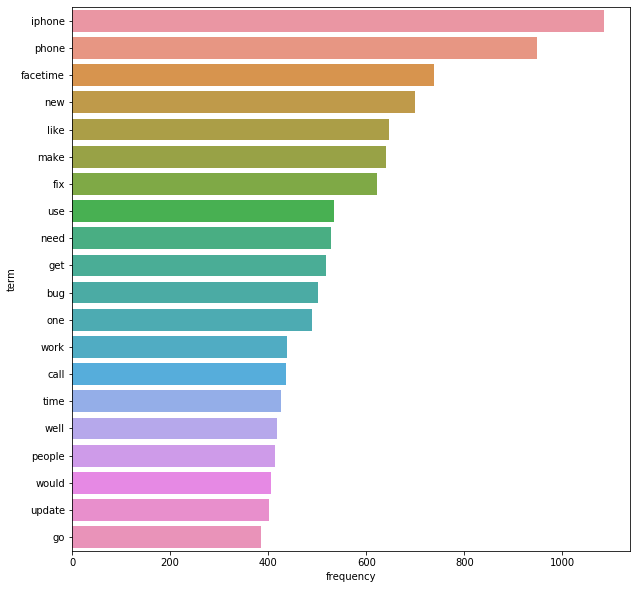

In [101]:
plt.figure(figsize = (10,10))

# plot the most frequent terms 

sns.barplot(x = 'frequency', y= 'term', data = term_df.head(20))

## Word Clouds

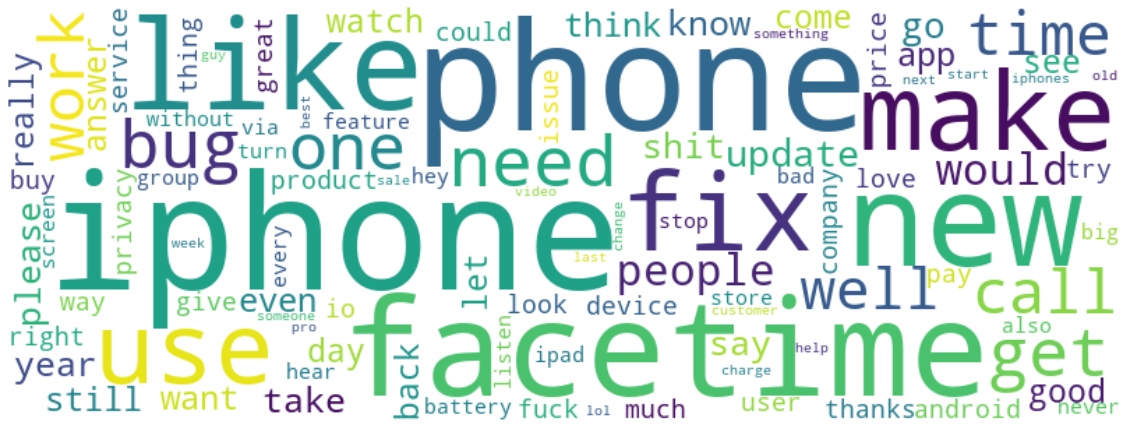

In [102]:
# create a dictionary of the most frequent terms 

term_dict = term_df.set_index('term')['frequency'].to_dict()

# create a word cloud of the most frequent terms 

cloud = WordCloud(width = 800, height = 300, background_color = 'white', max_words = 100)

cloud.generate_from_frequencies(term_dict)

# display the cloud 

plt.figure(figsize = (20, 10))

plt.imshow(cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Sentiment Analysis

In [103]:
# assign sentiment to each tweet

tweets['sentiment'] = tweets['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [104]:
# sentiment goes from -1 to +1

tweets.head()

,text,screen_name,favourites_count,retweet_count,verified,sentiment
0,true likely overprice late iphones mature mark...,waltmossberg,31007,160,True,0.03
1,yes,waltmossberg,31007,0,True,0.00
2,say many time regard multiple company market c...,waltmossberg,31007,0,True,0.00
3,say problem challenge say perspective order ma...,waltmossberg,31007,53,True,0.00
4,saw tracked confirm,digiphile,108196,0,True,0.00


In [106]:
# examine the worst tweets

tweets.sort_values(by = 'sentiment', ascending = True)[['text', 'sentiment']].head(20)

,text,sentiment
8525,either need fix conference call iphone max hor...,-1.0
3213,insane ever heard,-1.0
3839,nasty facetime bug could allow others eavesdro...,-1.0
2759,assume trading terribly,-1.0
1609,io release nasty surprise,-1.0
5201,dam facetime nasty,-1.0
2845,everyone worried facetime glitch concerned thi...,-1.0
690,never expect even get pathetic service,-1.0
3197,bug nasty happen differentiates act decisively...,-1.0
6804,dear result slowdown sale china could insanely...,-1.0


In [107]:
# positive tweets

tweets.sort_values(by = 'sentiment', ascending = False)[['text', 'sentiment']].head(20)

,text,sentiment
6626,would take deal already girl best phone ever,1.0
6230,dear one post video one conversation regard te...,1.0
6633,whoa best,1.0
3785,macos server errored mood deal yet another inc...,1.0
8446,think huawei best mate pro amaze,1.0
4848,need partner google map navigational voice use...,1.0
8469,perfect else need,1.0
3591,lose focus instead pick best technology squeez...,1.0
4921,hola awesome,1.0
7897,end filing radar option dock would awesome rep...,1.0


In [108]:
# count the positive tweets 

tweets[tweets['sentiment'] > 0.3]['sentiment'].count()

1481

In [109]:
# count the negative tweets

tweets[tweets['sentiment'] < - 0.3]['sentiment'].count()

790

In [110]:
TextBlob('good').sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [111]:
TextBlob('crazy').sentiment

Sentiment(polarity=-0.6, subjectivity=0.9)

## Text Classification

#### read in the yelp reviews

In [112]:
yelp = pd.read_csv('yelp.csv')

In [113]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


#### we want to build a model that predicts whether a body of text returns 1 or 5 stars

In [114]:
# create new DF that only has 1 and 5 stars

yelp_best_worst = yelp[(yelp.stars ==5) | (yelp.stars == 1)]

In [115]:
# define X and y

X = yelp_best_worst.text 
y = yelp_best_worst.stars

In [116]:
# split the new dataframe into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

### Creating features using CountVectorizer 

In [117]:
# use the CountVectorizer to create a document term matrices from X_train and X_test 

vect = CountVectorizer()

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [118]:
X_train_dtm.shape

(3064, 16825)

In [122]:
# furst 50 features

vect.get_feature_names()[:50]

['00',
 '000',
 '00a',
 '00am',
 '00pm',
 '01',
 '02',
 '03',
 '03342',
 '04',
 '05',
 '06',
 '07',
 '09',
 '0buxoc0crqjpvkezo3bqog',
 '0l',
 '10',
 '100',
 '1000',
 '1000x',
 '1001',
 '100th',
 '101',
 '102',
 '105',
 '1070',
 '108',
 '10am',
 '10ish',
 '10min',
 '10mins',
 '10minutes',
 '10pm',
 '10th',
 '10x',
 '11',
 '110',
 '1100',
 '111',
 '111th',
 '112',
 '115th',
 '118',
 '11a',
 '11am',
 '11p',
 '11pm',
 '12',
 '120',
 '128i']

In [121]:
# get last 50

vect.get_feature_names()[-50:]

['yyyyy',
 'z11',
 'za',
 'zabba',
 'zach',
 'zam',
 'zanella',
 'zankou',
 'zappos',
 'zatsiki',
 'zen',
 'zero',
 'zest',
 'zexperience',
 'zha',
 'zhou',
 'zia',
 'zihuatenejo',
 'zilch',
 'zin',
 'zinburger',
 'zinburgergeist',
 'zinc',
 'zinfandel',
 'zing',
 'zip',
 'zipcar',
 'zipper',
 'zippers',
 'zipps',
 'ziti',
 'zoe',
 'zombi',
 'zombies',
 'zone',
 'zones',
 'zoning',
 'zoo',
 'zoyo',
 'zucca',
 'zucchini',
 'zuchinni',
 'zumba',
 'zupa',
 'zuzu',
 'zwiebel',
 'zzed',
 'éclairs',
 'école',
 'ém']

In [125]:
# use logistic regression to predict the star rating 

from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_dtm, y_train)

y_pred = lr.predict(X_test_dtm)

In [126]:
y_pred

array([5, 1, 5, ..., 5, 1, 5], dtype=int64)

In [127]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

In [128]:
df

,Actual,Predicted
3922,5,5
8379,5,1
4266,5,5
5577,5,5
537,5,5
...,...,...
6846,5,5
1588,5,5
8451,5,5
7903,5,1


### Model Evaluation using Confusion Matrix 

In [129]:
from sklearn import metrics 

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[140,  44],
       [ 32, 806]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

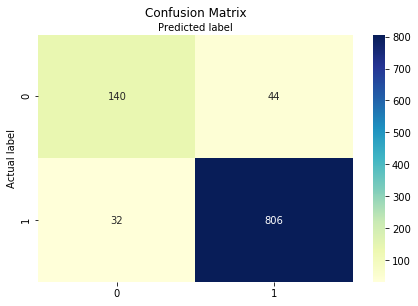

In [131]:
import numpy as np

# create a heatmap 
class_names = [1,5]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create the heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y =1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [134]:
from sklearn.metrics import confusion_matrix 
pd.DataFrame(confusion_matrix(y_pred, y_test), index = ['Predict *', 'Predict *****'], columns = ['Actual *', 'Actual *****'])

,Actual *,Actual *****
Predict *,140,32
Predict *****,44,806


In [135]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.76      0.79       184
           5       0.95      0.96      0.95       838

    accuracy                           0.93      1022
   macro avg       0.88      0.86      0.87      1022
weighted avg       0.92      0.93      0.92      1022



In [136]:
# from here we could go back and remove the stop words, and we could lemitize the data and clean tha data better
# and could repeat this logistic regression 
# we could see if our accuracy improved or not